In [1]:
import pandas as pd
import sqlite3 as db
from sqlite3 import Error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    try:
        conn = db.connect(db_file)
        return conn
    except Error as e:
        print(e)
        #conn.close()
    return None

In [4]:
database = 'InstacartFoodNutrions.db'
conn = create_connection(database)

In [7]:
if conn is not None:
    #cur = conn.cursor()
    all_products = pd.read_sql('SELECT * FROM instacart_raw_products', conn)
        

In [8]:
non_food_aisle_Id = [6, 11, 20, 22, 40, 41, 44, 47, 54, 55, 56, 60, 73, 74, 
            75, 80, 82, 85, 87, 97, 101, 102, 109, 114, 118, 126, 
            127, 132, 133]
non_food_dept_Id = [2, 11, 17]

In [18]:
non_food_products_df = all_products[all_products.aisle_id.isin(non_food_aisle_Id) &
                          all_products.department_id.isin(non_food_dept_Id)]  
food_products_df = all_products[~all_products.aisle_id.isin(non_food_aisle_Id) &
                          ~all_products.department_id.isin(non_food_dept_Id)]  

In [22]:
food_products_df['Type'] = 'Food'
non_food_products_df['Type'] = 'Non-Food'

C:\Users\mohamed.h.osman\anaconda3\envs\capstonEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mohamed.h.osman\anaconda3\envs\capstonEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
non_food_products_df.head()

,product_id,product_name,aisle_id,department_id,Type
5,6,Dry Nose Oil,11,11,Non-Food
12,13,Saline Nasal Mist,11,11,Non-Food
13,14,Fresh Scent Dishwasher Cleaner,74,17,Non-Food
21,22,Fresh Breath Oral Rinse Mild Mint,20,11,Non-Food
23,24,Tri-Vi-Sol® Vitamins A-C-and D Supplement Drop...,47,11,Non-Food


In [26]:
all_products_new = pd.concat([food_products_df, non_food_products_df])

In [27]:
all_products_new.head()

,product_id,product_name,aisle_id,department_id,Type
0,1,Chocolate Sandwich Cookies,61,19,Food
1,2,All-Seasons Salt,104,13,Food
2,3,Robust Golden Unsweetened Oolong Tea,94,7,Food
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,Food
4,5,Green Chile Anytime Sauce,5,13,Food


In [47]:
product_category = all_products_new.groupby('Type').size().reset_index().rename(columns={0:'Count'})

In [48]:
product_category.head()

,Type,count
0,Food,37867
1,Non-Food,8591


''

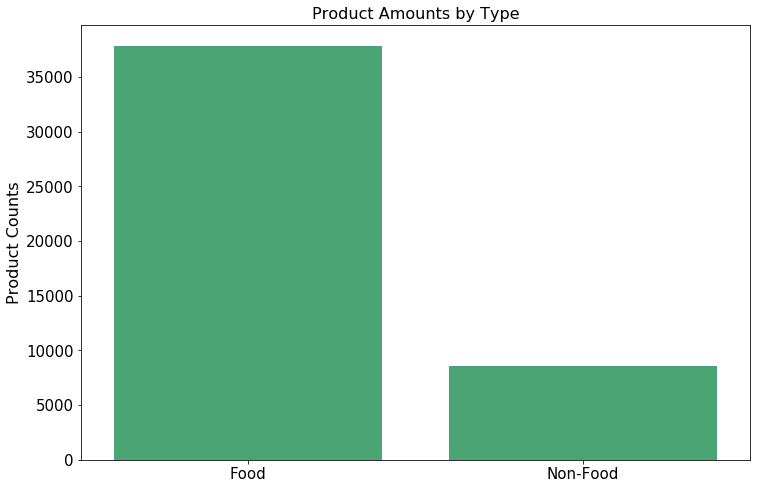

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(x=all_products_new.Type, color='mediumseagreen')

plt.title("Product Amounts by Type", fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Product Counts', fontsize=16)
plt.yticks(fontsize=15)
;

In [64]:
organic_food_df = pd.read_sql('SELECT * FROM instacart_food_products where product_name like "%organic%" ', conn)
non_organic_food_df = pd.read_sql('SELECT * FROM instacart_food_products where product_name not like "%organic%" ', conn)

In [65]:
organic_food_df['organic'] = 'organic'
non_organic_food_df['organic'] = 'non_organic'

In [66]:
organic_food_df.head()

,product_id,product_name,aisle_id,department_id,organic
0,23,Organic Turkey Burgers,49,12,organic
1,33,Organic Spaghetti Style Pasta,131,9,organic
2,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,organic
3,43,Organic Clementines,123,4,organic
4,47,Onion Flavor Organic Roasted Seaweed Snack,66,6,organic


In [68]:
all_food_products = pd.concat([organic_food_df, non_organic_food_df])
all_food_products.head()

,product_id,product_name,aisle_id,department_id,organic
0,23,Organic Turkey Burgers,49,12,organic
1,33,Organic Spaghetti Style Pasta,131,9,organic
2,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,organic
3,43,Organic Clementines,123,4,organic
4,47,Onion Flavor Organic Roasted Seaweed Snack,66,6,organic


''

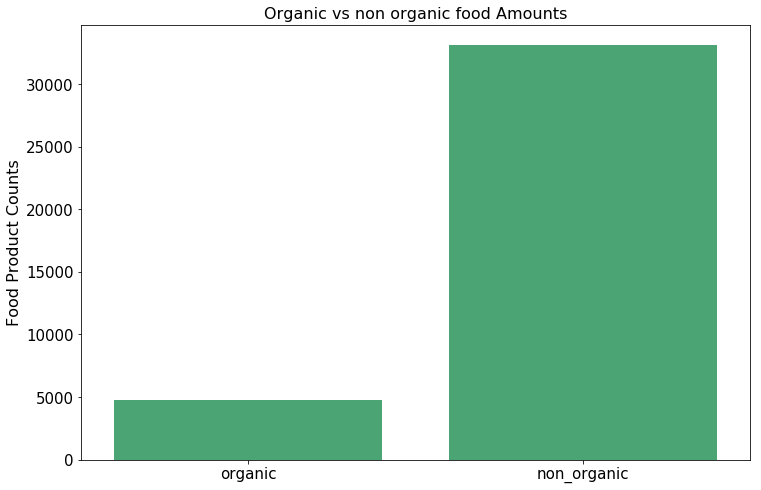

In [70]:
food_category = all_food_products.groupby('organic').size().reset_index().rename(columns={0:'Count'})
plt.figure(figsize=(12,8))
sns.countplot(x=all_food_products.organic, color='mediumseagreen')

plt.title("Organic vs Non Organic food Amounts", fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Food Product Counts', fontsize=16)
plt.yticks(fontsize=15)
;

In [106]:
departments_df = pd.read_csv('..//Instacart//departments.csv')
aisles_df = pd.read_csv('..//Instacart//aisles.csv')

In [116]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [108]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [117]:
dep_aisle_df = all_food_products.groupby(['department_id', 'aisle_id']).size().reset_index().rename(columns={0:'Count'})

In [124]:
dep_aisle_count_df = dep_aisle_df.groupby('department_id').size().reset_index().rename(columns={0:'Aisles Count'})

In [129]:
dep_name_aisle_count_df = pd.merge(dep_aisle_count_df, departments_df, on = 'department_id')
dep_name_aisle_df = pd.merge(dep_aisle_df, departments_df, on = 'department_id')

In [130]:
dep_name_aisle_df.head()

,department_id,aisle_id,Count,department
0,1,34,229,frozen
1,1,37,1091,frozen
2,1,38,880,frozen
3,1,42,189,frozen
4,1,52,296,frozen


''

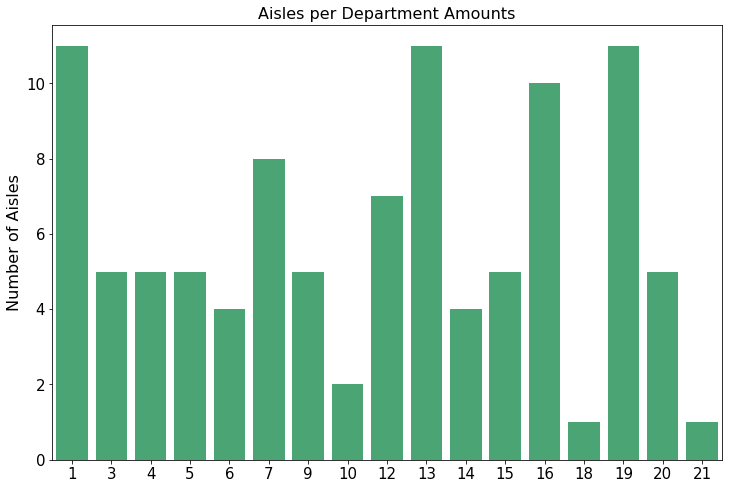

In [133]:

plt.figure(figsize=(12,8))
sns.countplot(x=dep_name_aisle_df.department_id, color='mediumseagreen')

plt.title("Aisles per Department Amounts", fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Number of Aisles', fontsize=16)
plt.yticks(fontsize=15)
;

''

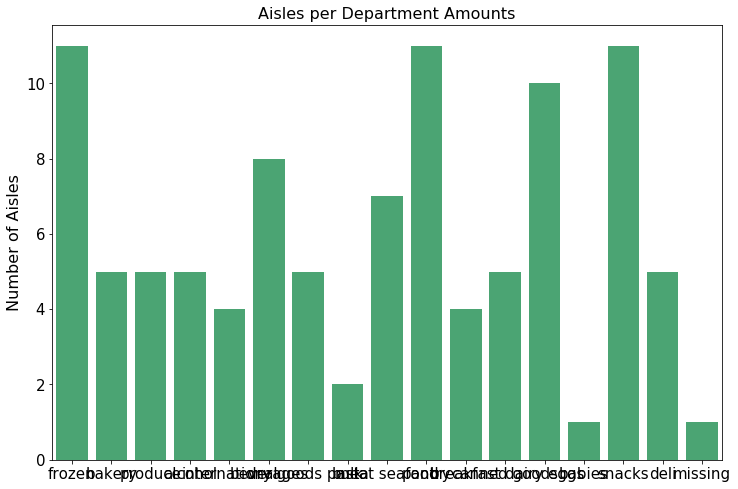

In [132]:

plt.figure(figsize=(12,8))
sns.countplot(x=dep_name_aisle_df.department, color='mediumseagreen')

plt.title("Aisles per Department Amounts", fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Number of Aisles', fontsize=16)
plt.yticks(fontsize=15)
;

In [71]:
food_calories = pd.read_sql('SELECT id, fdc_id, nutrient_id, amount FROM usda_food_nutrient where nutrient_id = 1008', conn)

In [72]:
food_calories.head()

,id,fdc_id,nutrient_id,amount
0,1283685,167512,1008,307.0
1,1283702,167513,1008,330.0
2,1283710,167514,1008,377.0
3,1283735,167515,1008,232.0
4,1283819,167516,1008,273.0


In [88]:
food_calories = pd.read_sql('SELECT lffp.product_id, lffp.product_name, ufn.amount as kcal FROM linked_fdcId_food_products lffp inner join usda_food_nutrient ufn on lffp.fdcId = ufn.fdc_id where ufn.nutrient_id = 1008', conn)

In [93]:
food_calories.head()

,product_id,product_name,kcal
0,36135,Green Tea Mochi Ice Cream Bonbons,200.0
1,20905,Barbecue Chipotle Sauce,162.0
2,27834,Hot 'N Spicy Barbecue Sauce,176.0
3,16919,"Barbecue Sauce, Original",189.0
4,34103,Barbecue Sauce Original,189.0


In [101]:
orders_df = pd.read_csv('..//Instacart//orders.csv')
orders_df.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [99]:
orders_type = orders_df.groupby('eval_set').size().reset_index().rename(columns={0:'Count'})
orders_type.head()

,eval_set,Count
0,prior,3214874
1,test,75000
2,train,131209


In [105]:
orders_df.groupby('eval_set')['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [97]:
order_prod_df = pd.read_csv('..//Instacart//order_products__train.csv')
order_prod_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
